# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset Telco
data=pd.read_csv("telcom_data.csv")

In [3]:
data.head() 

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
data.shape # Large dataset having 150001 rows and 55 columns

(150001, 55)

# Observations:

* We can see that we have 150001 rows and 55 columns in the data.

# Data Description:

bearer id: xDr session identifier

Dur. (ms):Total Duration of the xDR (in ms)

Start:Start time of the xDR (first frame timestamp)

Start ms:Milliseconds offset of start time for the xDR (first frame timestamp)

End:End time of the xDR (last frame timestamp)

End ms:	Milliseconds offset of end time of the xDR (last frame timestamp)

Dur.(s):Total Duration of the xDR (in s)

IMSI:International Mobile Subscriber Identity

MSISDN/Number:MS International PSTN/ISDN Number of mobile - customer number

IMEI:International Mobile Equipment Identity

Last Location Name:User location call name (2G/3G/4G) at the end of the bearer

Avg RTT DL (ms):Average Round Trip Time measurement Downlink direction (msecond)

Avg RTT UL (ms):Average Round Trip Time measurement Uplink direction (msecond)

Avg Bearer TP DL (kbps):Average Bearer Throughput for Downlink (kbps) - based on BDR duration

Avg Bearer TP UL (kbps):Average Bearer Throughput for uplink (kbps) - based on BDR duration

TCP DL Retrans. Vol (Bytes):TCP volume of Downlink packets detected as retransmitted (bytes)

TCP UL Retrans. Vol (Bytes):TCP volume of Uplink packets detected as retransmitted (bytes)

DL TP < 50 Kbps (%):Duration ratio when Bearer Downlink Throughput < ….

50 Kbps < DL TP < 250 Kbps (%):Duration ratio when Bearer Downlink Throughput range is …

250 Kbps < DL TP < 1 Mbps (%):Duration ratio when Bearer Downlink Throughput range is …

DL TP > 1 Mbps (%):Duration ratio when Bearer Downlink Throughput > ….

UL TP < 10 Kbps (%):Duration ratio when Bearer Uplink Throughput < ….

10 Kbps < UL TP < 50 Kbps (%):Duration ratio when Bearer Uplink Throughput range is …

50 Kbps < UL TP < 300 Kbps (%):Duration ratio when Bearer Uplink Throughput range is …

UL TP > 300 Kbps (%):Duration ratio when Bearer Uplink Throughput > ….

HTTP DL (Bytes):	HTTP data volume (in Bytes) received by the MS during this session

HTTP UL (Bytes):HTTP data volume (in Bytes) sent by the MS during this session

Activity Duration DL (ms):Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms

Activity Duration UL (ms):Activity Duration for uplink (ms) - excluding periods of inactivity > 500 ms

Dur. (ms):.1	Total Duration of the xDR (in ms)

Handset Manufacturer:Handset manufacturer 

Handset Type:Handset type of the mobile device

Nb of sec with 125000B < Vol DL:	Number of seconds with IP Volume DL >

Nb of sec with 1250B < Vol UL < 6250B:	Number of seconds with IP Volume UL between …

Nb of sec with 31250B < Vol DL < 125000B:	Number of seconds with IP Volume DL between …

Nb of sec with 37500B < Vol UL:	Number of seconds with IP Volume UL >

Nb of sec with 6250B < Vol DL < 31250B:	Number of seconds with IP Volume DL between …

Nb of sec with 6250B < Vol UL < 37500B:	Number of seconds with IP Volume UL between …

Nb of sec with Vol DL < 6250B:	Number of seconds with IP Volume DL <

Nb of sec with Vol UL < 1250B:	Number of seconds with IP Volume UL <

Social Media DL (Bytes):Social Media data volume (in Bytes) received by the MS during this session

Social Media UL (Bytes):Social Media data volume (in Bytes) sent by the MS during this session

YouTube DL (Bytes):YouTube data volume (in Bytes) received by the MS during this session

YouTube UL (Bytes):YouTube data volume (in Bytes) sent by the MS during this session

Netflix DL (Bytes):Netflix data volume (in Bytes) received by the MS during this session

Netflix UL (Bytes):Netflix data volume (in Bytes) sent by the MS during this session

Google DL (Bytes):Google data volume (in Bytes) Received by the MS during this session

Google UL (Bytes):Google data volume (in Bytes) sent by the MS during this session

Email DL (Bytes):Email data volume (in Bytes) Received by the MS during this session

Email UL (Bytes):Email data volume (in Bytes) sent by the MS during this session

Gaming DL (Bytes):Gaming data volume (in Bytes) Received by the MS during this session

Gaming UL (Bytes):	Gaming data volume (in Bytes) sent by the MS during this session

Other DL:	Other data volume (in Bytes) received by the MS during this session

Other UL:	Other data volume (in Bytes) sent by the MS during this session

Total DL (Bytes):	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)

Total UL (Bytes):	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)

	

In [5]:
#  the top 10 handsets used by the customers 
data['Handset Type'].value_counts(ascending=False).head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [6]:
#  the top 3 handset manufacturers 
data['Handset Manufacturer'].value_counts(ascending=False).head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [7]:
data.groupby(by= "Handset Manufacturer")["Handset Type"].value_counts().nlargest(5)

Handset Manufacturer  Handset Type           
Huawei                Huawei B528S-23A           19752
Apple                 Apple iPhone 6S (A1688)     9419
                      Apple iPhone 6 (A1586)      9023
undefined             undefined                   8987
Apple                 Apple iPhone 7 (A1778)      6326
Name: Handset Type, dtype: int64

In [8]:
# Identify the top 10 handsets used by customers
top_10_handsets = data['Handset Type'].value_counts().head(10)

# Identify the top 3 handset manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)

# Filter the data for the top 3 manufacturers
top_3_manufacturer_data = data[data['Handset Manufacturer'].isin(top_3_manufacturers.index)]

# Identify the top 5 handsets per top 3 handset manufacturers
top_5_handsets_per_manufacturer = top_3_manufacturer_data.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

# Print the results
print("Top 10 Handsets:")
print(top_10_handsets)

print("\nTop 3 Handset Manufacturers:")

Top 10 Handsets:
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

Top 3 Handset Manufacturers:


# TASK 1.1

• Aggregate per user the following information in the column 

• number of xDR sessions

• Session duration

• the total download (DL) and upload (UL) data

• the total data volume (in Bytes) during this session for each application


######  Aggregate per user the following information in the column



In [9]:
d={"Xdr_Session":data["Bearer Id"],
   "Dur_msec":data['Dur. (ms)'],
   "Activity Duration DL (ms)":data["Activity Duration DL (ms)"],
   "Activity Duration UL (ms)":data['Activity Duration UL (ms)'],
   "Social Media DL (Bytes)":data["Social Media DL (Bytes)"],
   "Social Media UL (Bytes)":data["Social Media UL (Bytes)"],
   "YouTube DL (Bytes)":data["Youtube DL (Bytes)"],
   "YouTube UL (Bytes)":data["Youtube UL (Bytes)"],
   "Netflix DL (Bytes)":data["Netflix DL (Bytes)"],
   "Netflix UL (Bytes)":data["Netflix UL (Bytes)"],
   "Google DL (Bytes)":data["Google DL (Bytes)"],
   "Google UL (Bytes)":data["Google UL (Bytes)"],
   "Google UL (Bytes)":data["Google UL (Bytes)"],
   "Email DL (Bytes)":data["Email DL (Bytes)"],
   "Email UL (Bytes)":data["Email UL (Bytes)"],
   "Gaming DL (Bytes)":data["Gaming DL (Bytes)"],
   "Gaming UL (Bytes)":data["Gaming UL (Bytes)"],
   "Other DL":data["Other DL (Bytes)"],
   "Other UL":data["Other UL (Bytes)"],
  "total_DL_vol(bytes)":data['Total DL (Bytes)'],
   "total_Ul_vol(bytes)":data["Total UL (Bytes)"]}

In [10]:
df=pd.DataFrame(d)

In [11]:
df

,Xdr_Session,Dur_msec,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),YouTube DL (Bytes),YouTube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL,Other UL,total_DL_vol(bytes),total_Ul_vol(bytes)
0,1.311448e+19,1823652.0,37624.0,38787.0,1.545765e+06,24420.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,308879636.0,36749741.0
1,1.311448e+19,1365104.0,168.0,3560.0,1.926113e+06,7165.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,653384965.0,53800391.0
2,1.311448e+19,1361762.0,0.0,0.0,1.684053e+06,42224.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,279807335.0,27883638.0
3,1.311448e+19,1321509.0,3330.0,37882.0,6.441210e+05,13372.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,846028530.0,43324218.0
4,1.311448e+19,1089009.0,0.0,0.0,8.626000e+05,50188.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,569138589.0,38542814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,81230.0,42376.0,41915.0,3.464974e+06,52091.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,574175259.0,57628851.0
149997,7.349883e+18,97970.0,17264.0,16759.0,2.344568e+06,7613.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,666648844.0,39135081.0
149998,1.311448e+19,98249.0,25003.0,28640.0,1.245845e+06,14394.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,592786405.0,34912224.0
149999,1.311448e+19,97910.0,13405.0,34088.0,8.015470e+05,21562.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,371895920.0,29626096.0


#####  number of xDR sessions



In [12]:
len(df['Xdr_Session'])

150001

##### the total download (DL) and upload (UL) data



In [13]:
a=pd.DataFrame(df.groupby(by= ["Activity Duration DL (ms)","Activity Duration UL (ms)"])["Dur_msec"].count())

In [14]:
a

Dur_msec
Activity Duration DL (ms) Activity Duration UL (ms)          
0.0                       0.0                            4540
                          1.0                              26
                          2.0                              20
                          3.0                              14
                          4.0                              17
...                                                       ...
86393579.0                86397048.0                        1
86396487.0                86385896.0                        1
86401708.0                86397346.0                        1
87188182.0                83131277.0                        1
136536461.0               82889939.0                        1

[144112 rows x 1 columns]

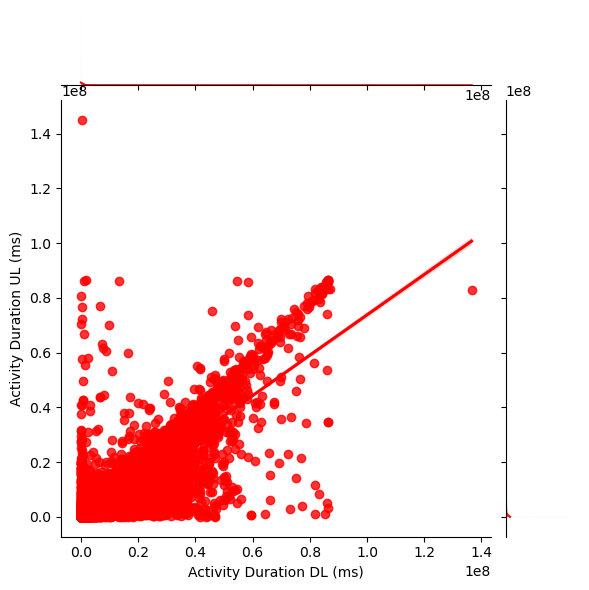

In [23]:
# Total Activity upload and download

sns.jointplot(df['Activity Duration DL (ms)'],df['Activity Duration UL (ms)'],color="red",kind='reg')
plt.xlabel('Activity Duration DL (ms)')
plt.ylabel('Activity Duration UL (ms)')
plt.show()

##### • the total data volume (in Bytes) during this session for each application

In [16]:
names=['Social Media DL (Bytes)','Social Media UL (Bytes)','YouTube DL (Bytes)','YouTube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL','Other UL','total_DL_(bytes)','total_Ul_(bytes)']
values=[df['Social Media DL (Bytes)'].sum(),df['Social Media UL (Bytes)'].sum(),df['YouTube DL (Bytes)'].sum(),df['YouTube UL (Bytes)'].sum(),df['Netflix DL (Bytes)'].sum(),df['Netflix UL (Bytes)'].sum(),df['Google DL (Bytes)'].sum(),df['Google UL (Bytes)'].sum(),df['Email DL (Bytes)'].sum(),df['Email UL (Bytes)'].sum(),df['Gaming DL (Bytes)'].sum(),df['Gaming UL (Bytes)'].sum(),df['Other DL'].sum(),df['Other UL'].sum(),df['total_DL_vol(bytes)'].sum(),df['total_Ul_vol(bytes)'].sum()]

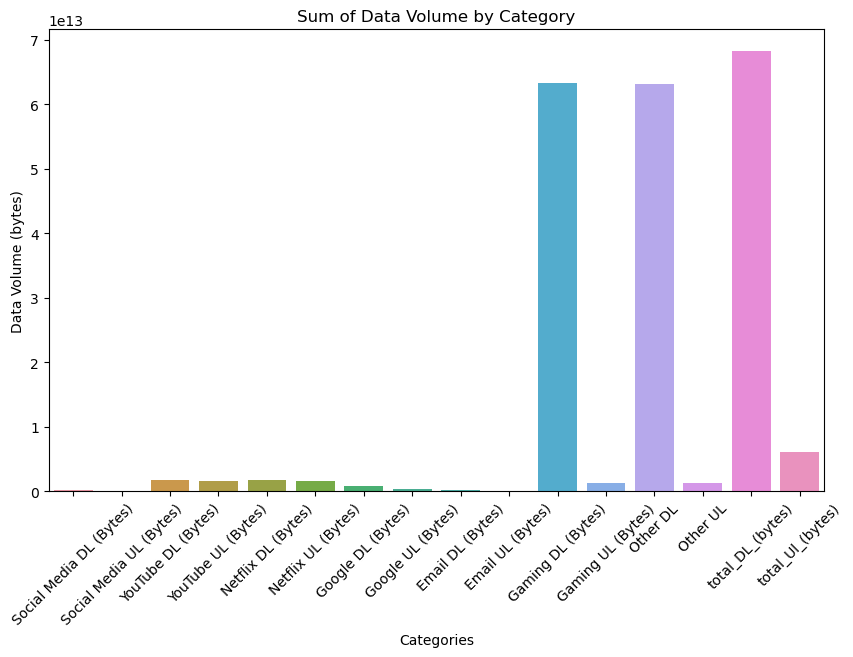

In [17]:
# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=names, y=values)
plt.xlabel('Categories')
plt.ylabel('Data Volume (bytes)')
plt.title('Sum of Data Volume by Category')
# Rotate the x-axis labels if needed
plt.xticks(rotation=45)
plt.savefig('Sum of Data Volume by Category.png')
# Display the chart
plt.show()

######  Maximum amount of data volume consumed by applications are Total_DL_(Bytes), Gaming_UL_(Bytes),Email_UL_(Bytes)

In [33]:
# Grouping the application as per duration in ms consumed

In [34]:
grouped_df=df.groupby(by=['Dur_msec','Social Media DL (Bytes)','Social Media UL (Bytes)','YouTube DL (Bytes)','YouTube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL','Other UL','total_DL_vol(bytes)','total_Ul_vol(bytes)'])['Dur_msec'].sum().sort_values(ascending=False)

In [35]:
b=pd.DataFrame(grouped_df)

In [42]:
b

,,,,,,,,,,,,,,,,,Dur_msec
Dur_msec,Social Media DL (Bytes),Social Media UL (Bytes),YouTube DL (Bytes),YouTube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL,Other UL,total_DL_vol(bytes),total_Ul_vol(bytes),
1859336.0,2701953.0,8961.0,10163169.0,6427023.0,19192742.0,21799809.0,1498463.0,307216.0,194386.0,739735.0,236781692.0,1839956.0,273131802.0,4844901.0,270532405.0,35967601.0,1859336.0
1859327.0,627028.0,48866.0,11795585.0,3798756.0,5359834.0,7098414.0,9075232.0,1902888.0,2785411.0,608252.0,828368274.0,16333321.0,365492157.0,3041753.0,858011364.0,32832250.0,1859327.0
1823652.0,1545765.0,24420.0,15854611.0,2501332.0,8198936.0,9656251.0,1634479.0,1271433.0,3563542.0,137762.0,278082303.0,14344150.0,171744450.0,8814393.0,308879636.0,36749741.0,1823652.0
1772931.0,859133.0,65305.0,3649875.0,7425183.0,21943878.0,10618913.0,7195764.0,280142.0,261404.0,81219.0,319118338.0,14590933.0,74538623.0,12788921.0,353028392.0,45850616.0,1772931.0
1686493.0,3363967.0,13568.0,19240610.0,19536043.0,4567263.0,2128171.0,3900380.0,4015803.0,2710625.0,895048.0,382902598.0,2029871.0,60372214.0,7139029.0,416685443.0,35757533.0,1686493.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7258.0,2443771.0,48286.0,21456183.0,13693316.0,229311.0,13409943.0,9311637.0,704362.0,1399574.0,230311.0,755864149.0,11701779.0,221966892.0,6166979.0,790704625.0,45954976.0,7258.0
7212.0,2797137.0,13837.0,2292574.0,16267121.0,18108034.0,4863883.0,2545140.0,776921.0,124272.0,800938.0,84332620.0,6793938.0,136763971.0,748096.0,110199777.0,30264734.0,7212.0
7189.0,3411184.0,20606.0,4021769.0,18356290.0,17318394.0,15030318.0,4295782.0,1162852.0,796828.0,232152.0,188548890.0,15125404.0,772185484.0,11484060.0,218392847.0,61411682.0,7189.0


In [43]:

b.shape

(150000, 1)